# 1er Curso de Fluidodinámica con Python

Saberes previos:
* Clase N01: Ecuaciones de convección lineal y no lineal, difusión para casos 1-D, ecuación de Burgers, condiciones de borde periódicas y la constante CFL.
* Clase N02: Desarrollo de aplicaciones desktop GUI

## Numpy: Operaciones con Matrices

La librería Numpy ayuda a hacer calculos más exigentes en un menor tiempo de ejecución, veamos que se quiere resolver la siguiente ecuación discretizada:

$$u^{n+1}_i = u^n_i-u^n_{i-1}$$

Hacemos un calculo a partir de un vector $u^n = [0, 1, 2, 3, 4, 5]$, hallaremos $u^{n+1}$ iterando los valores del vector $u^n$ con un bucle `for`.

In [1]:
import numpy as np # Importar numpy y contraerla a la forma np

u = np.array((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)) # Matriz de 1x11

for i in range(1, len(u)):
  print(u[i]-u[i-1])

1
1
1
1
1
1
1
1
1
1


Otra forma de resolver $u^{n+1}_i$ es en su forma vectorizada mediante arrays:


In [2]:
u[1:]-u[0:-1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Ecuación de convección lineal 2D:
El código que se llega a mostrar en las siguientes celdas pretenderá hacer una comparación en cuanto al tiempo de calculo con la finalidad de que el participante pueda entender y así adecuar sus equemas a casos de mayor complejidad.

In [3]:
# definimos nuestras condiciones iniciales
nx = 101
ny = 101
nt = 200
c = 1
Lx = 10.
Ly = 10.
dx = Lx/(nx - 1)
dy = Ly/(ny - 1)
sigma = .2
dt = sigma*dx

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

u = np.ones((ny, nx)) # Se crea un vector de 1xn de unos
un = np.ones((ny, nx))

# Asignamos las condiciones iniciales
x1 = 3.5
x2 = 6.5
y1 = 3.5
y2 = 6.5
ue = 3.
u[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)] = ue

Ahora usamos la función mágica *%%timeit* el cual ejecutará la tarea varias veces estimando un tiempo promedio de calculo.

In [4]:
%%timeit # Esto es una función mágica
u = np.ones((ny, nx))
u[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)]=ue

for n in range(nt+1):
  un[:] = u[:]
  for i in range(1, len(u)):
    for j in range(1, len(u)):
      u[i,j] = un[i,j] - (c*(dt/dx)*(un[i,j] - un[i-1,j])) - (c*(dt/dy)*(un[i,j]-un[i,j-1]))
      u[0,:] = 1
      u[-1,:] = 1
      u[:,0] = 1
      u[:,-1]

11.2 s ± 45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Acabamos de ver el caso anterior donde el tiempo promedio para el resultado fue de un total de 13 s para un esquema de anidamiento.

In [5]:
%%timeit
u = np.ones((ny,nx))
u[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)]=ue

for n in range(nt+1):
  un[:] = u[:]
  u[1:,1:] = un[1:,1:]-(c*(dt/dx)*(un[1:,1:]-un[0:-1,1:]))-(c*(dt/dy)*(un[1:,1:]-un[1:,1:]-un[1:,0:-1]))
  u[0,:] = 1
  u[-1,:] = 1
  u[:,0] = 1
  u[:,-1] = 1

25 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Haciendo nuestro código en forma vectorizada el tiempo de calculo es mucho menor de tan solo 40.9 ms.

Ahora como en la clase 01 resolveremos las mismas ecuaciones solo que a partir de lo visto hoy en las líneas anteriores trabajaremos para un espacio en 2 dimensiones.

Definimos el espacio bidimensional uniforme en una mmala rectangular donde cada punto es $x_i$ , $y_i$:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Valiendonos del método de diferencias finitas con $x$ e $y$ con los subindices $i$ y $j$ para la ya definida que es $u_{i,j} = u(x_i,y_j)$ . Todo nuestro trabajo viene de la expansión de Taylor en 2D ya que de acá se fundamentan las derivadas parciales que vemos en este curso , un punto de la malla con valor aproximado será $u_{i,j}$.

La derivada parcial en el espacio x con diferencias finitas se puede representar como:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

En el espacio usamos diferencias finitas retrazadas por lo tanto para Y sería semejante.

## Convección lineal en 2D

Ecuación de convección 2D en su forma de derivadas parcial (EDP):

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

Es justamente como vimos para el caso de 1D , solo que sé agrega una componente espacial mas para lograr la malla 2D.

Para el espacio $x$ usabamos el subindice $i$ y para $y$ usamos el subindice $j$ con el fin de representar el espacio en la ecuación discretizada.

Convección lineal 2D discretizada:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

Despejando el termino $u_{i,j}^{n+1}$:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

Condiciones iniciales:

$$u(x) = \begin{cases}
\begin{matrix}
4\ \text{para} & 1.5 \leq x \leq 3 \cr
1\ \text{para} & \text{cualquier otro sitio}\end{matrix}\end{cases}$$

Condiciones de contorno:

$$u = 1\ \text{para } \begin{cases}
\begin{matrix}
x =  0,\ 10 \cr
y =  0,\ 10 \end{matrix}\end{cases}$$

Populating the interactive namespace from numpy and matplotlib


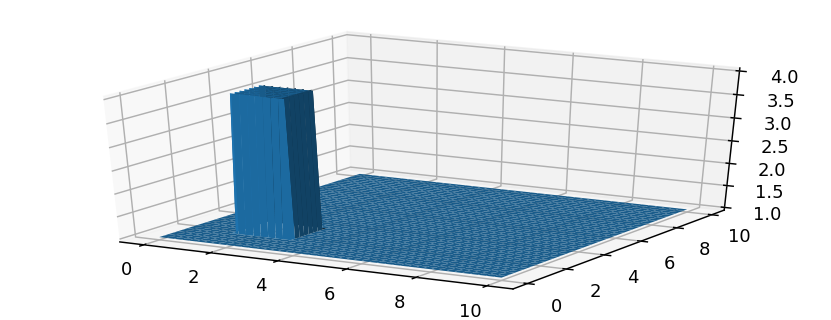

In [6]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Condiciones iniciales
nx = 91
ny = 91
nt = 150
c = 1
x = 10.
y = 10.
dx = x/(nx-1)
dy = y/(ny-1)
sigma = .2
dt = sigma*dx

x = np.linspace(0, x, nx)
y = np.linspace(0, y, ny)

y1 = 1.5
y2 = 3.
x1 = 1.5
x2 = 3.
ue = 4.

u = np.ones((ny, nx))
un = np.ones((ny, nx))

# Asignación de las condiciones iniciales
u[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)]=ue

# Representar condiciones iniciales
fig = plt.figure(figsize=(8,3), dpi=130)

## Los parametros figsize pueden ser usados para cambiar el temaño y resolucion
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u[:])

Estudio de la onda en dos dimensiones haciendo uso del esquema *for* anidados para los subindices que corresponden a $i$ y $j$. Al trabajar de manera multidimensional es decir con muchos anidamientos se podría hallar casos de relantizamientos durante su ejecución del script.

### Esquema de anidamiento

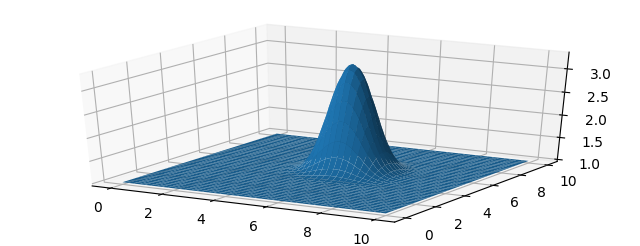

In [7]:
u = np.ones((ny, nx))
u[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)]=ue

for n in range(nt+1):
  un[:] = u[:]
  for i in range(1, len(u)):
    for j in range(1, len(u)):
      u[i,j] = un[i,j] - (c*(dt/dx)*(un[i,j] - un[i-1,j])) - (c*(dt/dy)*(un[i,j]-un[i,j-1]))
      u[0,:] = 1
      u[-1,:] = 1
      u[:,0] = 1
      u[:,-1] = 1
fig = plt.figure(figsize=(8,3),dpi=(100))
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X,Y,u[:])

 ### Esquema vectorizado
 Resolvemos a partir de las mismas condiciones del caso anterior para las componentes de $x$ e $y$:

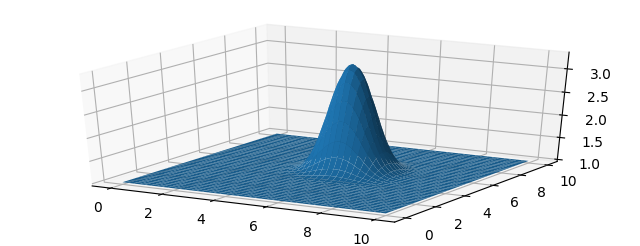

In [8]:
u = np.ones((ny, nx))
u[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)]=ue

for n in range(nt+1):
  un[:] = u[:]
  u[1:,1:] = un[1:,1:] - (c*(dt/dx)*(un[1:,1:] - un[0:-1,1:])) - (c*(dt/dy)*(un[1:,1:]-un[1:,0:-1]))
  u[0,:] = 1
  u[-1,:] = 1
  u[:,0] = 1
  u[:,-1] = 1
fig = plt.figure(figsize=(8,3),dpi=(100))
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X,Y,u[:])

## Ecuación de Convección 2D
En este instante comenzamos a trabajar con sistemas acoplados en el espacio para las componentes $x$ y $y$:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

De manera analoga al caso unidimensional se hace la discretización para el termino del tiempo y el espacio:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

### Condiciones iniciales
Sobre esto se conservan de manera analogo al caso estudiando en 1D, aunque tambièn ahora afecta tanto a $x$ como a $y$:

$$u,\ v\ = \begin{cases}\begin{matrix}
1.5 & \text{para } x,y \in (10, 20)\times(10,20) \cr
2.5 & \text{en el resto de puntos}
\end{matrix}\end{cases}$$

### Condiciones de contorno

Las condiciones de contorno son u y v igual a 1 a lo largo de los límites de la malla (cuadrícula).

$$u = 1,\ v = 1 \text{ para } \begin{cases} \begin{matrix}x=0,40\cr y=0,40 \end{matrix}\end{cases}$$

In [9]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

### Declaración de variables
nx = 151
ny = 151
nt = 80
c = 1
Lx = 40.
Ly = 40.
dx = Lx/(nx-1)
dy = Ly/(ny-1)
sigma = .2
dt = sigma*dx

x1 = 10.
x2 = 20.
y1 = 10.
y2 = 20.

ue1 = 1.5
ue2 = 2.5

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

u = np.ones((ny,nx))
v = np.ones((ny,nx))
un = np.ones((ny,nx))
vn = np.ones((ny,nx))

## Asignando variables iniciales
u[int(y1/dy):int(y2/dy+1),int(x1/dx):int(x2/dx+1)]=ue1
v[int(y1/dy):int(y2/dy+1),int(x1/dx):int(x2/dx+1)]=ue2

for n in range(nt+1):
  un[:] = u[:]
  vn[:] = v[:]

  u[1:,1:]=un[1:,1:]-(un[1:,1:]*(dt/dx)*(un[1:,1:]-un[0:-1,1:]))-un[1:,1:]*(dt/dy)*(un[1:,1:]-un[1:,0:-1])
  v[1:,1:]=vn[1:,1:]-(vn[1:,1:]*(dt/dx)*(vn[1:,1:]-vn[0:-1,1:]))-vn[1:,1:]*(dt/dy)*(vn[1:,1:]-vn[1:,0:-1])

  u[0,:] = 1
  u[-1,:] = 1
  u[:,0] = 1
  u[:,-1] = 1

  v[0,:] = 1
  v[-1,:] = 1
  v[:,0] = 1
  v[:,-1] = 1

Populating the interactive namespace from numpy and matplotlib


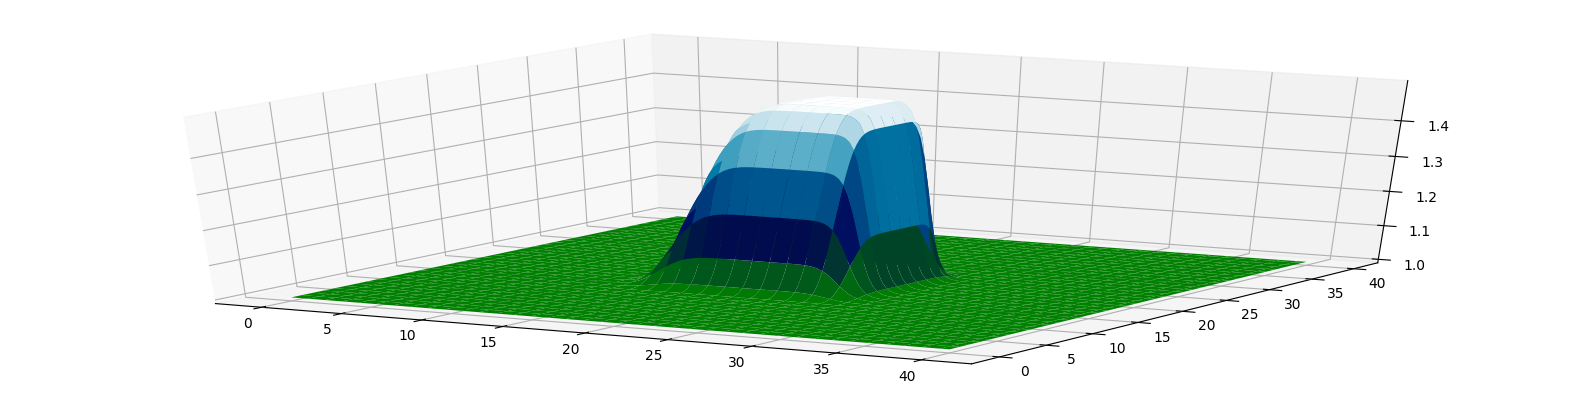

In [10]:
from matplotlib import cm
fig = plt.figure(figsize=(20,5), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,u, cmap=cm.ocean)

# Ecuación de Difusión 2D

La notación en su forma diferencia es:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

Utilizamos la forma de discretizar que vimos cuando estudiabamos la difusión para 1D, contando con diferencias adelantadas para el tiempo y dos derivadas de segundo orden.

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Despejando para resolver $u_{i,j}^{n+1}$:

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

Populating the interactive namespace from numpy and matplotlib


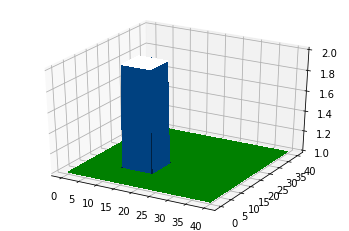

(1, 4.0)

In [11]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

nx = 101
ny = 101
nt = 50
nu = .05
Lx = 40.
Ly = 40.
dx = Lx/(nx-1)
dy = Ly/(ny-1)
sigma = .25
dt = sigma*dx*dy/nu

x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)

x1 = 10.
x2 = 18.
y1 = 10.
y2 = 18.

ue = 2.

u = np.ones((ny,nx))
un = np.ones((ny,nx))

u[int(y1/dy):int(y2/dy+1),int(x1/dx):int(x2/dx+1)] = ue

fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.ocean, linewidth=0, antialiased=False)
plt.show()
ax.set_xlim(1,Lx)
ax.set_ylim(1,Ly)
ax.set_zlim(1,ue+2)


$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

In [12]:
# Ahora creamos un método que resuelva la ecuación hasta un tiempo nt
def difusion(nt):
  u[int(y1/dy):int(1/dy+1),int(x1/dx):int(x2/dx+1)] = ue
  for n in range(nt+1):
    un[:] = u[:]
    u[1:-1,1:-1] = un[1:-1, 1:-1]+nu*(dt/dx**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+nu*(dt/dy**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])
    u[0,:]=1
    u[-1,:]=1
    u[:,0]=1
    u[:,-1]=1

  fig = plt.figure()
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.ocean, linewidth=0, antialiased=True)
  ax.set_zlim(1,ue+0.5)
  plt.show()

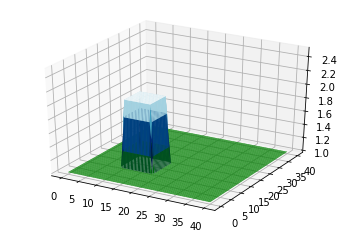

In [13]:
difusion(0)

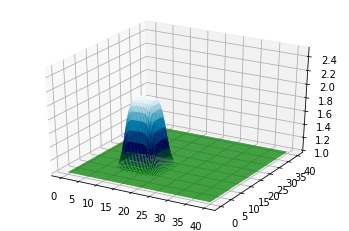

In [14]:
difusion(10)

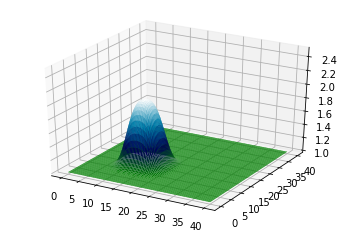

In [15]:
difusion(20)

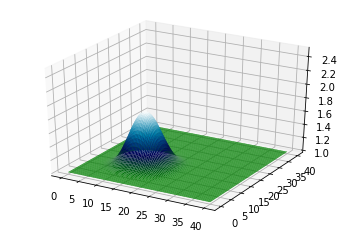

In [16]:
difusion(50)

## Ecuación de Burgers para 2D

Sabemos que la ecuación de Burgers combina a las ecuaciones de convección y difusión , así mismo da soluciones discontinuas cuando se tiene una condición inicial que es "suave", veamos que secede en dos simensiones:

Nuestras ecuaciones acopladas para 2D en su forma de EDPs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

Discretizando:

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = $$
$$\qquad \nu \bigg( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \bigg)$$

$$
\frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = $$
$$\nu \bigg( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \bigg)$$

Ahora despejamos $u_{i,j}^{n+1}$ y $v_{i,j}^{n+1}$ quedando de la forma:

$$u_{i,j}^{n+1} = u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j+1}^n)$$ 

$$v_{i,j}^{n+1} =  v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j+1}^n)$$ 

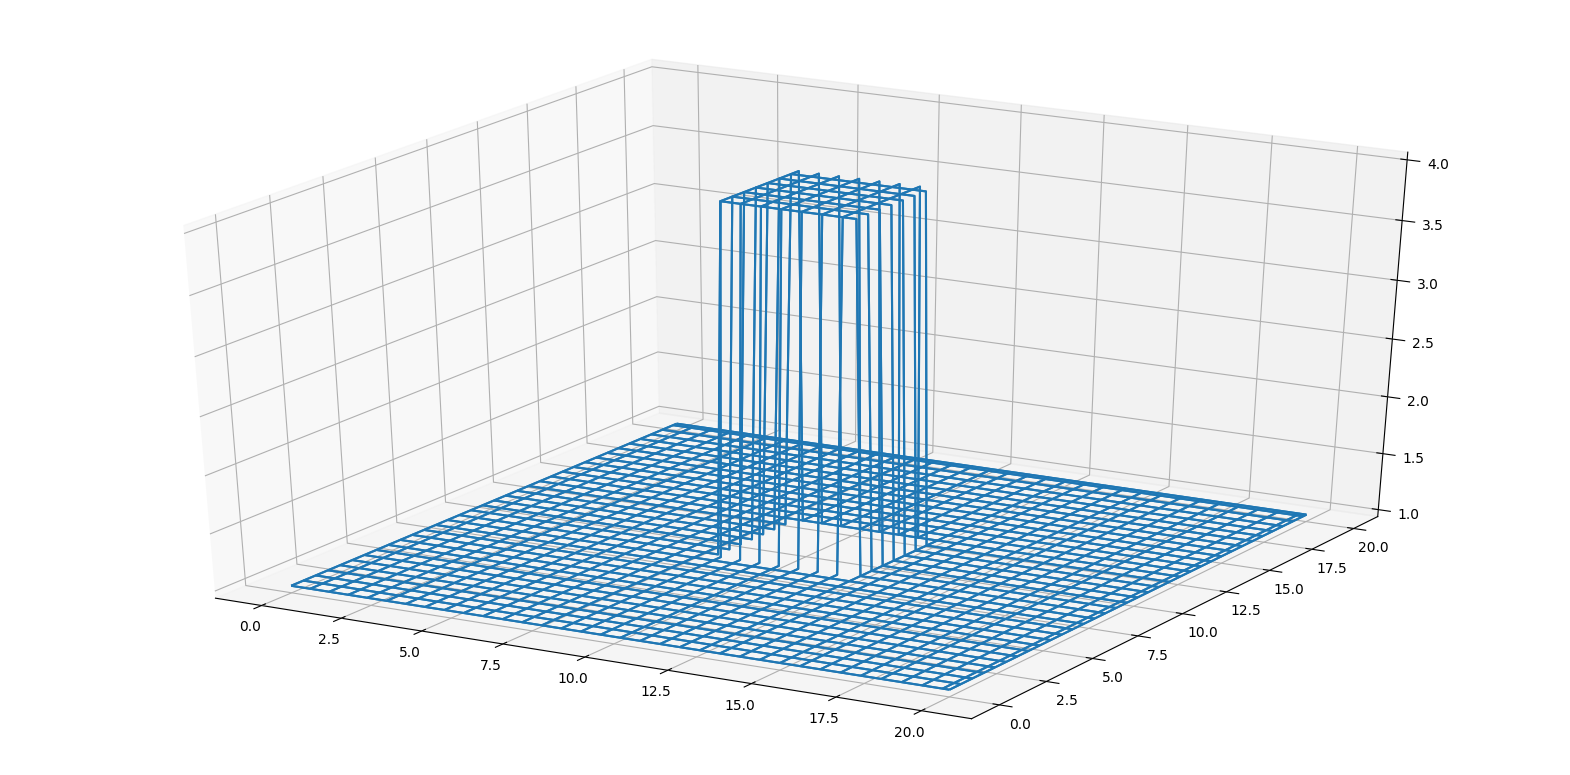

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

### Declarando variables
nx = 101
ny = 101
nt = 100
c = 1
Lx = 20.
Ly = 20.
dx = Lx/(nx-1)
dy = Ly/(ny-1)
sigma = 0.0009
nu = 0.01
dt = sigma*dx*dy/nu

x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)

u = np.ones((ny,nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

### Asignar variables iniciales

## Establecer la funciòn sombrero como condición inicial:
y1 = 8.5
y2 = 12.5
x1 = 8.5
x2 = 12.5
ue = 4.

u[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)]=ue

v[int(y1/dy):int(y2/dy+1), int(x1/dx):int(x2/dx+1)]=ue

### Representar las condiciones iniciales
fig = plt.figure(figsize=(20,10), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
wire1 = ax.plot_wireframe(X,Y,u[:], cmap=cm.ocean)
wire2 = ax.plot_wireframe(X,Y,v[:], cmap=cm.ocean)

plt.show()

In [18]:
for n in range(nt+1):
  un[:] = u[:]
  vn[:] = v[:]

  u[1:-1,1:-1] = un[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1] - un[0:-2,1:-1]) - (dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1] - un[1:-1,0:-2]) + nu*(dt/dx**2)*(un[2:,1:-1]-2*un[1:-1,1:-1] + un[0:-2,1:-1]) + nu*(dt/dy**2)*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2])

  v[1:-1,1:-1] = vn[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1] - vn[0:-2,1:-1]) - (dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1] - vn[1:-1,0:-2]) + nu*(dt/dx**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) + nu*(dt/dy**2)*(vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,0:-2])

  u[0,:] = 1
  u[-1,:] = 1
  u[:,0] = 1
  u[:,-1] = 1

  v[0,:] = 1
  v[-1,:] = 1
  v[:,0] = 1
  v[:,-1] = 1

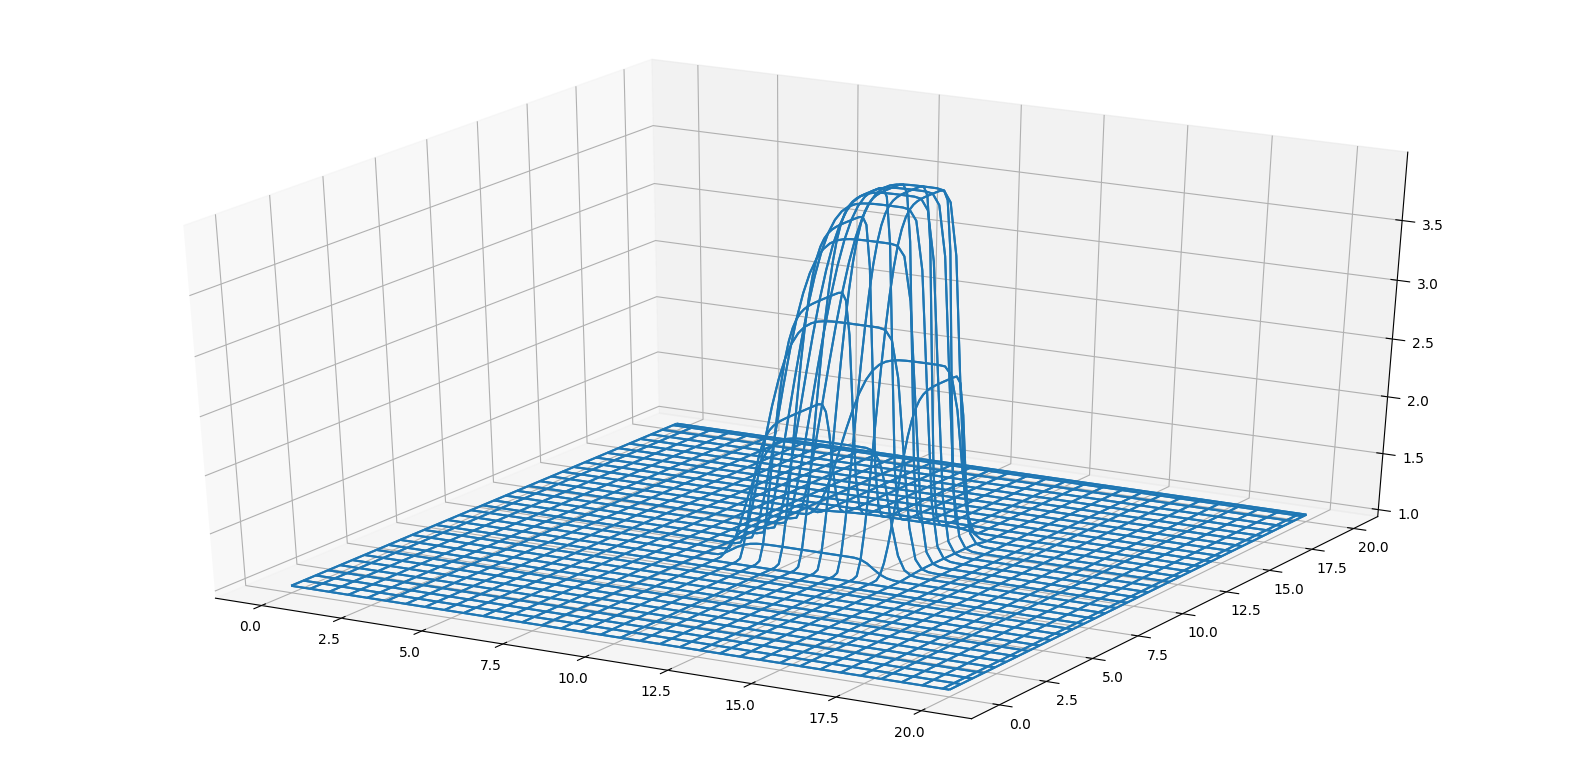

In [19]:
fig = plt.figure(figsize=(20,10), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
wire1 = ax.plot_wireframe(X,Y,u[:])
wire2 = ax.plot_wireframe(X,Y,v[:])
plt.show()

## Ecuación de Laplace en 2D

Laplace en 2D en su forma de derivadas parciales como ecuación:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

La ecuación de Laplace cuenta con características de los fenómenos de difusión, por ello siendo de la forma de derivada de segundo orden se debe discretizar con diferencias finitas centradas para que así esta sea consistente con la física que se desea reproducir:

Ecuación de Laplace 2D discretizada:

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

En esta ecuación se observa que no existe una dependencia al tiempo, no existe $p^{n+1}$, acá se llega al estado de equilibrio en el sistema mediante las condiciones que se le entreguen a este.

Asi mismo la ecuación de Laplace se dice que es una ecuación de calor en estado estacionario, esto lo puedes notar mejor si revisas tus apuntes personales sobre transferencia de calor.

Ahora tenemos como objetivo resolver a $p_{i,j}^n$ mediante iteraciones hasta conseguir una condición que se especifica. Lograremos el equilibrio si el número de iteraciones tiende a $\infty$, pero podemos aproximar el estado de equilibrio iterando hasta que el cambio entre una iteración y la siguiente sea *mìnimo".

Despejando para $p_{i,j}^n$:

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

El esquema de diferencias centradas de segundo orden en ambas compoentes, , corresponde con el método más ampliamente aplicado para el operador de Laplace. También se conoce como el **five-point difference operator**, aludiendo a su plantilla de cinco puntos.

Vamos a resolver la ecuación de Laplace numéricamente asumiendo un estado inicial de $p=0$ en todas partes. Entonces añadiremos las condiciones de contorno de la siguiente manera:

$p=0$ en $x=0$

$p=y$ en $x=2$

$\frac{\partial p}{\partial y}=0$ en $y=0, \ 1$

En estas condiciones, hay una solución analítica para la ecuación de Laplace:

$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y$$

Veamos como resolver la ecuación de Laplace numéricamente considerando un estado inicial de $p=0$ en todas partes. Entonces añadiremos las condiciones de contorno de la siguiente manera:

$p=0$ en $x=0$

$p=y$ en $x=2$

$\frac{\partial p}{\partial y}=0$ en $y=0, \ 1$

En estas condiciones, hay una solución analítica para la ecuación de Laplace:

$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y$$

In [20]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [21]:
def plot2D(x, y, p):
  fig = plt.figure(figsize=(11,7), dpi=100)
  ax = fig.gca(projection='3d')
  X,Y = np.meshgrid(x,y)
  surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.ocean, linewidth=0, antialiased=False)
  ax.set_xlim(0,lx)
  ax.set_ylim(0,ly)
  ax.view_init(30, 225) # Ángulo de visión

In [22]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    while l1norm > l1norm_target:
        pn[:] = p[:]
        p[1:-1,1:-1] = (dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1])+dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]))/(2*(dx**2+dy**2)) 
        p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))
        p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2)) 
    
        p[:,0] = 0
        p[:,-1] = y
        p[0,:] = p[1,:]
        p[-1,:] = p[-2,:]
        l1norm = (np.sum(np.abs(p[:])-np.abs(pn[:])))/np.sum(np.abs(pn[:]))
     
    return p

In [23]:
## Creación de variables
nx = 31
ny = 31
c = 1
lx = 2.
ly = 1.
dx = lx/(nx-1)
dy = ly/(ny-1)


## Condiciones iniciales
p = np.zeros((ny,nx)) ##create a XxY vector of 0's


## Guías del gráfico
x = np.linspace(0,lx,nx)
y = np.linspace(0,ly,ny)

## Condiciones de contorno
p[:,0] = 0
p[:,-1] = y
p[0,:] = p[1,:]
p[-1,:] = p[-2,:]

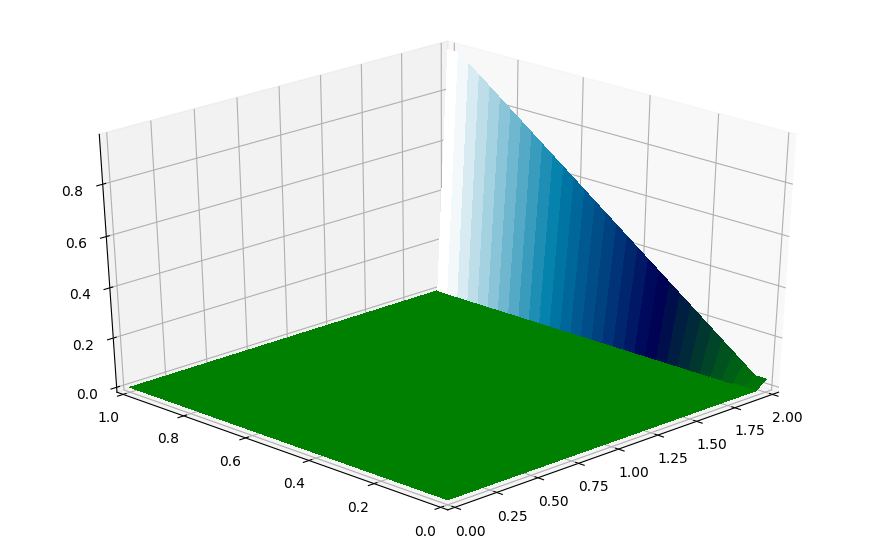

In [24]:
plot2D(x, y, p)

In [25]:
p = laplace2d(p, y, dx, dy, .01)

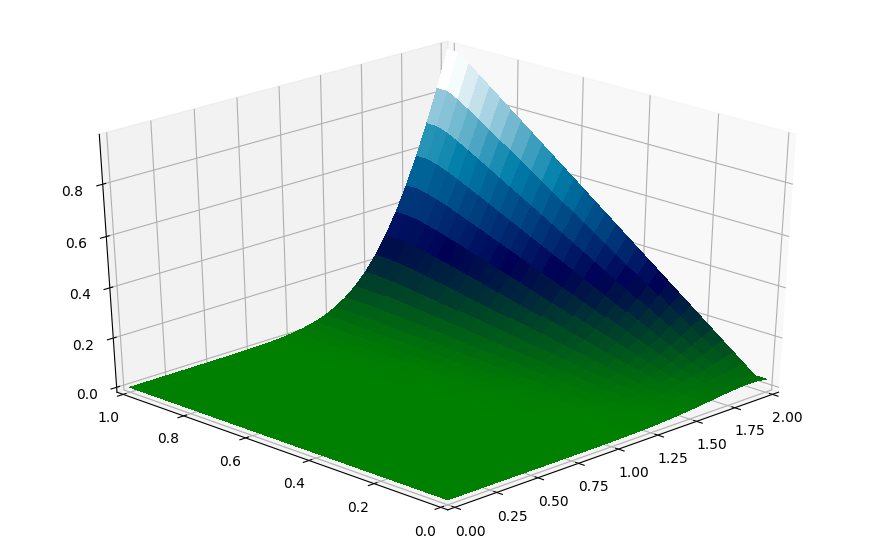

In [26]:
plot2D(x, y, p)

Pensemos en la ecuaciones de Navier-Stokes para un fluido incompresible, donde $\vec{v}$ representa el campo de velocidades:

\begin{eqnarray}
\nabla \cdot\vec{v} &=& 0\\\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &=& -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{eqnarray}

La primera ecuación representa la conservación de la masa manteniendo la densidad constante. La segunda ecuación es la conservación del momento. Sin embargo, aparece un problema: la ecuación de continuidad para el flujo incompresible no tiene una variable dominante y no hay manera obvia para acoplar la velocidad y la presión. En el caso de flujo compresible, por contra, la continuidad de la masa proporcionaría una ecuación con la evolución de la densidad $\rho$, que está acoplada con una ecuación de estado que relaciona $\rho$ y $p$.

En flujo incompresible, la ecuación de continuidad $\nabla \cdot\vec{v}=0$ proporciona una *restricción cinemática* que requiere que el campo de presión evolucione de manera que la tasa de expansión $\nabla \cdot\vec{v}$ debería desaparecer en todas partes. Una forma de salir de esta dificultad es *construir* un campo de presión que garantice que la continuidad se satisface, tal relación se puede obtener mediante la adopción de la divergencia de la ecuación de momento. En este proceso la ecuación de Poisson para la presión aparece.



## Ecuación de Poisson en 2D

La ecuación de Poisson se obtiene añadiendo un término fuente a la derecha de la ecuación de Laplace:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

Así, a diferencia de la ecuación de Laplace, hay algo de valor finito en el interior del campo que afecta a la solución. La ecuación de Poisson actúa para "relajar" las fuentes iniciales en el campo.

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

Reorganizamos para obterner una ecuación para $p$ en el punto $i,j$. Así se obtiene:

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

Considerando un estado inicial de $p=0$ en todas partes, y aplicando las siguientes condiciones de contorno vamos a resolver la ecuación de $p_{i,j}^{n}$:

$p=0$ en $x=0, \ 2$ y $y=0, \ 1$

y el término fuente se compone de dos picos iniciales en el interior del dominio, de la siguiente manera:

$b_{i,j}=100$ en $i=nx/4, j=ny/4$

$b_{i,j}=-100$ en $i=nx*3/4, j=3/4 ny$

$b_{i,j}=0$ en el resto de puntos.

Las iteraciones avanzarán en pseudo-tiempo para relajar los picos iniciales. La relajación bajo la ecuación de Poisson se vuelve más y más lenta a medida que evolucionan.

In [27]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
nx = 81
ny = 81
nt  = 250
xmin = 0.
xmax = 2.
ymin = 0.
ymax = 2.

dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)

# Inicialización
p  = np.zeros((nx,ny))
pd = np.zeros((nx,ny))
b  = np.zeros((nx,ny))
x  = np.linspace(xmin,xmax,nx)
y  = np.linspace(xmin,ymax,ny)

# Fuente
b[int(nx/4)][int(ny/4)]  = 100
b[int(3*nx/4)][int(3*ny/4)] = -100

Populating the interactive namespace from numpy and matplotlib


In [28]:
for it in range(nt):

    pd[:][:]=p[:][:]

    p[1:nx-1,1:ny-1] = ( dy**2/(2*(dx**2+dy**2))*(pd[2:nx,1:ny-1]+pd[0:nx-2,1:ny-1]) + \
                        dx**2/(2*(dx**2+dy**2))*(pd[1:nx-1,2:ny]+pd[1:nx-1,0:ny-2]) - \
                        b[1:nx-1,1:ny-1]*dx**2*dy**2/(2*(dx**2+dy**2)) )

    p[0,:] = p[nx-1,:] = p[:,0] = p[:,ny-1] = 0.0

In [29]:
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface( X,Y,p[:], rstride=1, cstride=1, cmap=cm.ocean,
            linewidth=0, antialiased=True )
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.view_init(30,75)

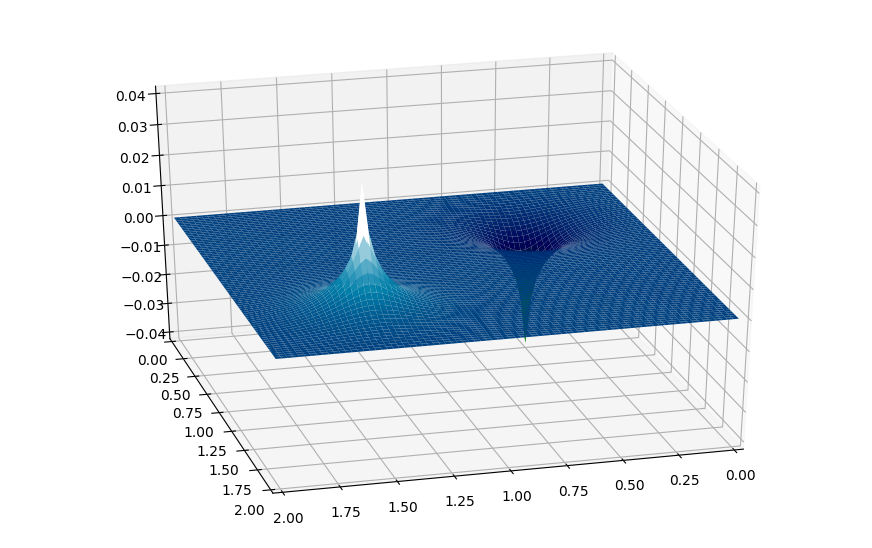

In [30]:
plot2D(x, y, p)

## Optimizando código con Numba
Es la librería para Python que ayuda a aumentar nuestra velocidad de código Python ya que compila nuestros métodos al estilo C haciendo uso de LLVM .

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

## Declaración de variables
nx = 101
ny = 101
c = 1
lx = 2.
ly = 2.
dx = lx/(nx-1)
dy = ly/(ny-1)

## Condiciones iniciales
p = np.zeros((ny,nx))

## Guias de la figura (malla)
x = np.linspace(0,lx,nx)
y = np.linspace(0,ly,ny)

## Condicioes de frontera
p[:,0] = 0
p[0:-1] = y
p[0,:] = p[1,:]
p[-1,:] = p[-2,:]

In [32]:
def laplace2d(p, y, dx, dy, l1norm_target):
  l1norm = 1
  pn = np.empty_like(p)

  while l1norm > l1norm_target:
    pn[:] = p[:]
    p[1:-1,1:-1] = (dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1])+dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]))/(2*(dx**2+dy**2))
    p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))
    p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2))

    p[:,0] = 0
    p[:,-1] = y
    p[0,:] = p[1,:]
    p[-1,:] = p[-2,:]
    l1norm = (np.sum(np.abs(p[:])-np.abs(pn[:])))/np.sum(np.abs(pn[:]))
  return p

In [33]:
%%timeit
laplace2d(p, y, dx, dy, 0.00001)

197 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
def laplace2d_vanilla(p, y, dx, dy, l1norm_target):
  l1norm = 1
  pn = np.empty_like(p)
  nx, ny = len(y), len(y)

  while l1norm > l1norm_target:
    pn[:] = p[:]

    for i in range(1, nx-1):
      for j in range(1, ny-1):
        p[i, j] = (dy**2*(pn[i+1,j]+pn[i-1,j])+dx**2*(pn[i,j+1]-pn[i,j-1]))/(2*(dx**2+dy**2))

    p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))
    p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2))

    p[:,0] = 0
    p[:,-1] = y
    p[0,:] = p[1,:]
    p[-1,:] = p[-2,:]
    l1norm = (np.sum(np.abs(p[:])-np.abs(pn[:])))/np.sum(np.abs(pn[:]))

  return p

In [35]:
%%timeit
laplace2d_vanilla(p, y, dx, dy, 0.00001)

21.6 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
14.7*1e-3/(152*1e-6)

96.71052631578948

In [37]:
from numba import autojit

In [38]:
@autojit
def laplace2d_numba(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    while l1norm > l1norm_target:
        pn[:] = p[:]
        p[1:-1,1:-1] = (dy**2*(pn[2:,1:-1]+pn[0:-2,1:-1])+dx**2*(pn[1:-1,2:]+pn[1:-1,0:-2]))/(2*(dx**2+dy**2)) 
        p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))
        p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2)) 
    
        p[:,0] = 0
        p[:,-1] = y
        p[0,:] = p[1,:]
        p[-1,:] = p[-2,:]
        l1norm = (np.sum(np.abs(p[:])-np.abs(pn[:])))/np.sum(np.abs(pn[:]))
     
    return p

/home/jhongesell/Documentos/Informatica/Entornos_virtuales/Entornos_pip_venv/entorno01N01/lib/python3.6/site-packages/numba/decorators.py:29: NumbaDeprecationWarning: autojit is deprecated, use jit instead, which provides the same functionality. For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-numba-autojit
  warnings.warn(NumbaDeprecationWarning(msg))


In [39]:
%%timeit
laplace2d_numba(p, y, dx, dy, .00001)

136 µs ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
@autojit
def laplace2d_vanilla_numba(p, y, dx, dy, l1norm_target):
  l1norm = 1
  pn = np.empty_like(p)
  nx, ny = len(y), len(y)

  while l1norm > l1norm_target:
    pn[:] = p[:]

    for i in range(1, nx-1):
      for j in range(1, ny-1):
        p[i,j] = (dy**2*(pn[i+1,j]+pn[i-1,j])+dx**2*(pn[i,j+1]-pn[i,j-1]))/(2*(dx**2+dy**2))
        
    p[0,0] = (dy**2*(pn[1,0]+pn[-1,0])+dx**2*(pn[0,1]+pn[0,-1]))/(2*(dx**2+dy**2))
    p[-1,-1] = (dy**2*(pn[0,-1]+pn[-2,-1])+dx**2*(pn[-1,0]+pn[-1,-2]))/(2*(dx**2+dy**2))

    p[:,0] = 0
    p[:,-1] = y
    p[0,:] = p[1,:]
    p[-1,:] = p[-2,:]
    l1norm = (np.sum(np.abs(p[:])-np.abs(pn[:])))/np.sum(np.abs(pn[:]))

  return p

/home/jhongesell/Documentos/Informatica/Entornos_virtuales/Entornos_pip_venv/entorno01N01/lib/python3.6/site-packages/numba/decorators.py:29: NumbaDeprecationWarning: autojit is deprecated, use jit instead, which provides the same functionality. For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-numba-autojit
  warnings.warn(NumbaDeprecationWarning(msg))


In [41]:
%%timeit
laplace2d_vanilla_numba(p, y, dx, dy, .00001)

116 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Flujo en una cavidad con Navier-*Stokes*

Ecuación de momento en forma de vector de un campo de velocidad $\vec{v}$ es:

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

Esto representa tres ecuaciones escalares, una para cada componente de la velocidad $(u,v,w)$. Pero lo resolveremos en dos dimensiones, por lo que habrá dos ecuaciones escalares

Ahora aquí está el sistema de ecuaciones diferenciales: dos ecuaciones para las componentes  $u,v$ de la velocidad  y una ecuación para la presión:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

Con lo visto antes ya sabemos cómo discretizar todos estos términos.

### Ecuaciones discretizadas

En primer lugar, vamos a discretizar la ecuacion del momento-$u$, de la siguiente manera:

\begin{eqnarray}
&&\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y}\\\ 
&&=-\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

De forma similar para la ecuación del momento-$v$:

\begin{eqnarray}
&&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

Por último, la ecuación de la presión de Poisson-discretizado se puede escribir así:

$$ \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
$$

Como recomendación sugeriría puedas escribir todas las ecuaciones en un blog de notas a mano alzada e ir repasando en tu mente lo que estas haciendo.

La ecuación del momento en la dirección $u$:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

la ecuación del momento en la dirección $v$:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$

Reorganizamos la ecuación de presión-Poisson.

$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)} \times$$

$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\right. $$

$$ -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

La condición incial es $u, v, p = 0$ en todos los puntos, y las condiciones de contorno son:

$u=1$ en $y=2$ (la "tapa" en movimiento);

$u, v=0$ en las otras fronteras;

$\frac{\partial p}{\partial y}=0$ en $y=0$;

$p=0$ en $y=2$

$\frac{\partial p}{\partial x}=0$ en $x=0,2$


In [42]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

nx = 81
ny = 81
nt = 60
nit = 50
c = 1
Lx = 2.
Ly = 2.
dx = Lx/(nx-1)
dy = Ly/(ny-1)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
Y, X = np.meshgrid(y,x)

rho = 1
nu = .1
dt = 0.001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

Populating the interactive namespace from numpy and matplotlib


In [43]:
def buildUpB(b, rho, dt, u, v, dx, dy):
    
    b[1:-1,1:-1]=rho*(1/dt*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx)+(v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))-\
                      ((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx))**2-\
                      2*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dy)*(v[2:,1:-1]-v[0:-2,1:-1])/(2*dx))-\
                      ((v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))**2)
    return b

In [44]:
def presPoisson(p, dx, dy, b):
    pn = np.empty_like(p)
    pn[:] = p[:]
    
    for q in range(nit):
        pn[:] = p[:]
        p[1:-1,1:-1] = ((pn[2:,1:-1]+pn[0:-2,1:-1])*dy**2+(pn[1:-1,2:]+pn[1:-1,0:-2])*dx**2)/\
        (2*(dx**2+dy**2)) -\
        dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]
        
        p[-1,:] =p[-2,:]
        p[0,:] = p[1,:]
        p[:,0]=p[:,1]
        p[:,-1]=0
        
    return p

In [45]:
def cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un[:] = u[:]
        vn[:] = v[:]
        
        b = buildUpB(b, rho, dt, u, v, dx, dy)
        p = presPoisson(p, dx, dy, b)
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
            un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
            vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
            dt/(2*rho*dx)*(p[2:,1:-1]-p[0:-2,1:-1])+\
            nu*(dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+\
            dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]))
        
        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
            un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
            vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
            dt/(2*rho*dy)*(p[1:-1,2:]-p[1:-1,0:-2])+\
            nu*(dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])+\
            (dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])))

        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = 1
        v[0,:] = 0
        v[-1,:]=0
        v[:,0] = 0
        v[:,-1] = 0
        u[-1,:] = 0
        
    return u, v, p

Text(0, 0.5, 'Y')

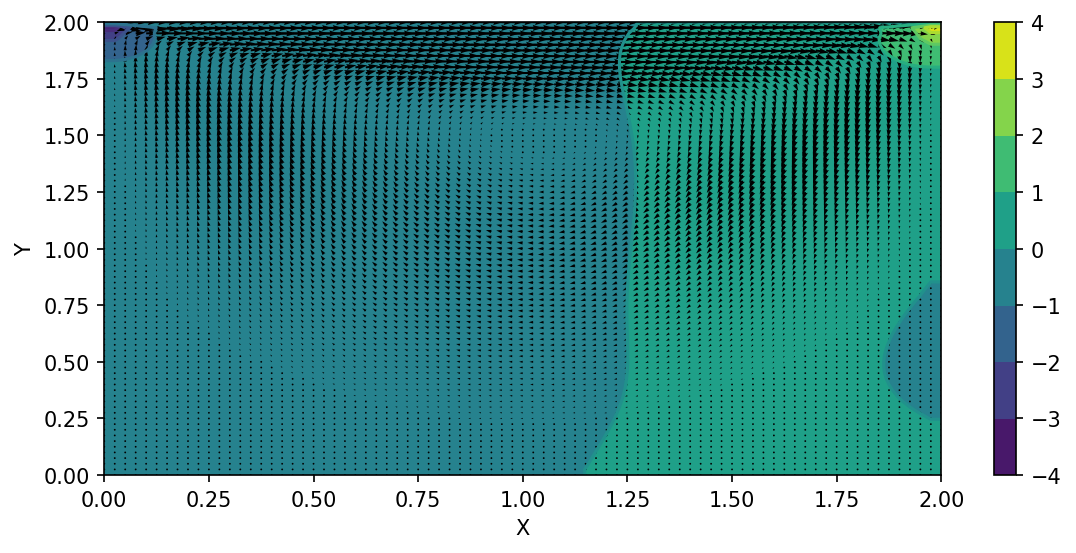

In [46]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 10000
u, v, p = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu)
fig = plt.figure(figsize=(9,4), dpi=150)
plt.contourf(X,Y,p,alpha=1.)
plt.colorbar()
plt.contour(X,Y,p)
plt.quiver(X[::1,::1],Y[::1,::1],u[::1,::1],v[::1,::1])
plt.xlabel('X')
plt.ylabel('Y')

Se puede ver que dos zonas de presión diferentes se están formando y que la forma de espiral que se espera se está empezando a formar en este problema de flujo en una cavidad con tapa en movimiento. Experimenta con diferentes valores de `nt` para ver el tiempo que el sistema tarda en estabilizarse.

Text(0, 0.5, 'Y')

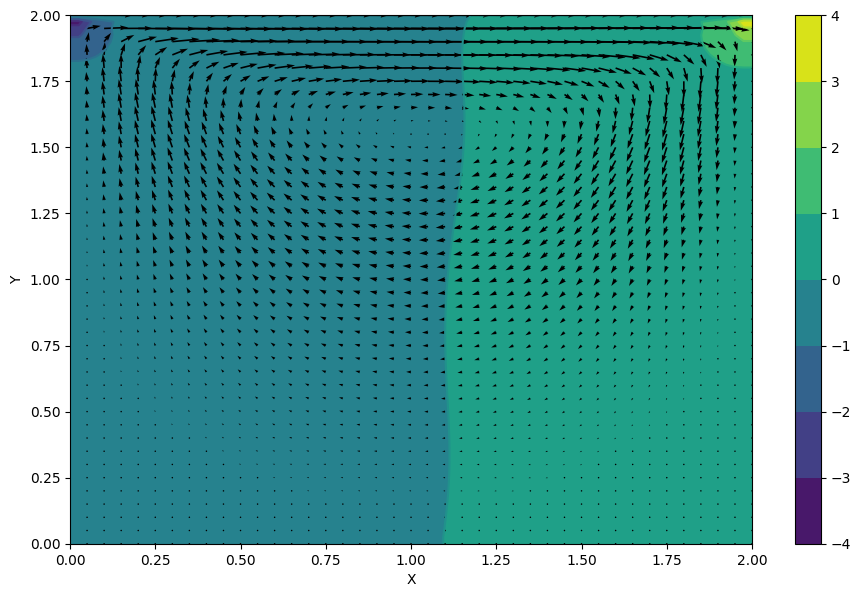

In [47]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 700
u, v, p = cavityFlow(nt, u, v, dt, dx, dy, p, rho, nu)
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X,Y,p,alpha=1)
plt.colorbar()
plt.contour(X,Y,p)
plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2])
plt.xlabel('X')
plt.ylabel('Y')

## Conducción por un canal con Navier-Stokes

La única diferencia entre esta última parte y el caso anterior es que vamos a añadir un término fuente de la ecuación de momento-$u$, para imitar el efecto de presión ejercida en un canal. Aquí están nuestras ecuaciones de Navier-Stokes modificadas:

\begin{eqnarray}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}&=&-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F\\\
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}&=&-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)
\end{eqnarray}

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

### Ecuaciones discretizadas

Con paciencia y cuidado, escribimos la forma de las ecuaciones discretizadas. Es muy recomendable que escribas esto a mano, siguiendo mentalmente cada término mientras lo escribes.

La ecuación de momento-$u$:

\begin{eqnarray}
&&\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}\\\
&&+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{eqnarray}

La ecuación de momento-$v$:

\begin{eqnarray}
&&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}\\\
&&+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{eqnarray}

Y la ecuación de presión

\begin{eqnarray}
&&\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}\\\
&&=\rho\left(\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.\\\
&&-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\\\
&&-2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}\\\
&&-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)
\end{eqnarray}

Como siempre, tenemos que volver a organizar estas ecuaciones a la forma que necesitamos en el código para que las iteraciones avancen:

Para los componentes $u$- y $v$ de la ecuación de momento, despejamos la velocidad en el instante `n+1`:

$$u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})-v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})
-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})$$
$$+\nu\left[\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right] + F\Delta t$$

$$
v_{i,j}^{n+1}=v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})-v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})$$
$$+\nu\left[\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right]$$

Y para la ecuación de la presión, despejamos $p_{i,j}^n$ para iterar en el pseudo-tiempo:

$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}\times
$$
$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)- \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} \right.$$
$$- 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

La condición inicial es $u, v, p=0$ en todos los puntos, y en la frontera la condición es:

$u, v, p$ son periódicas en $x=0,2$

$u, v =0$ en $y =0,2$

$\frac{\partial p}{\partial y}=0$ at $y =0,2$

$F=1$ en el resto.

En el caso anterior se había aislado una parte de la ecuación incorporada para que fuera más fácil de analizar y aquí vamos a hacer lo mismo. Una cosa a destacar es que tenemos condiciones de contorno periódicas en toda esta malla, por lo que necesitamos para calcular de forma explícita los valores en el borde de entrada y salida de nuestra `vector` u.


In [48]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [49]:
def buildUpB(rho, dt, dx, dy, u, v):
    b = np.zeros_like(u)
    
    b[1:-1,1:-1]=rho*(1/dt*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx)+(v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))-\
                      ((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx))**2-\
                      2*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dy)*(v[2:,1:-1]-v[0:-2,1:-1])/(2*dx))-\
                      ((v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))**2)
    #### Condición de contorno periódica de presión @ x = 2
    b[-1,1:-1]=rho*(1/dt*((u[0,1:-1]-u[-2,1:-1])/(2*dx)+(v[-1,2:]-v[-1,0:-2])/(2*dy))-\
                    ((u[0,1:-1]-u[-2,1:-1])/(2*dx))**2-\
                    2*((u[-1,2:]-u[-1,0:-2])/(2*dy)*(v[0,1:-1]-v[-2,1:-1])/(2*dx))-\
                    ((v[-1,2:]-v[-1,0:-2])/(2*dy))**2)	
 
    #### Condición de contorno periódica de presión @ x = 0
    b[0,1:-1]=rho*(1/dt*((u[1,1:-1]-u[-1,1:-1])/(2*dx)+(v[0,2:]-v[0,0:-2])/(2*dy))-\
                   ((u[1,1:-1]-u[-1,1:-1])/(2*dx))**2-\
                   2*((u[0,2:]-u[0,0:-2])/(2*dy)*(v[1,1:-1]-v[-1,1:-1])/(2*dx))-\
                   ((v[0,2:]-v[0,0:-2])/(2*dy))**2)
    
    return b

In [50]:
def presPoissPeriodic(p, dx, dy):
    pn = np.empty_like(p)
    
    for q in range(nit):
        pn[:]=p[:]
        p[1:-1,1:-1] = ((pn[2:,1:-1]+pn[0:-2,1:-1])*dy**2+(pn[1:-1,2:]+pn[1:-1,0:-2])*dx**2)/\
        (2*(dx**2+dy**2)) - dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]
        
        #### Condición de contorno periódica de presión @ x = 2
        p[-1,1:-1] = ((pn[0,1:-1]+pn[-2,1:-1])*dy**2+(pn[-1,2:]+pn[-1,0:-2])*dx**2)/\
        (2*(dx**2+dy**2)) - dx**2*dy**2/(2*(dx**2+dy**2))*b[-1,1:-1]
        
        #### Condición de contorno periódica de presión @ x = 0
        p[0,1:-1] = ((pn[1,1:-1]+pn[-1,1:-1])*dy**2+(pn[0,2:]+pn[0,0:-2])*dx**2)/\
        (2*(dx**2+dy**2)) -\
        dx**2*dy**2/(2*(dx**2+dy**2))*b[0,1:-1]
        
        #### Condicion de contorno en la pared, presión
        # dp/dy = 0 at y = 2
        p[-1,:] = p[-2,:]
        # dp/dy = 0 at y = 0
        p[0,:] = p[1,:]
    
    return p

In [51]:
## Creación de variables
nx = 41
ny = 41
nt = 10
nit=50 
c = 1
Lx = 2.
Ly = 2.
dx = Lx/(nx-1)
dy = Ly/(ny-1)
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)
Y,X = np.meshgrid(y,x)


## Variables físicas
rho = 1
nu = .1
F = 1
dt = .01

# Condiciones inciales
u = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0
un = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0

v = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0
vn = np.zeros((ny,nx)) ## Crea un vecotr XxY de 0

p = np.ones((ny,nx)) ## Crea un vecotr XxY de unos
pn = np.ones((ny,nx)) ## Crea un vecotr XxY de unos

b = np.zeros((ny,nx))

In [52]:
udiff = 1
stepcount = 0

while udiff > .001:
    un[:] = u[:]
    vn[:] = v[:]
	
    b = buildUpB(rho, dt, dx, dy, u, v)
    p = presPoissPeriodic(p, dx, dy)
		
    u[1:-1,1:-1] = un[1:-1,1:-1]-\
		un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
		vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
		dt/(2*rho*dx)*(p[2:,1:-1]-p[0:-2,1:-1])+\
		nu*(dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+\
		dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]))+F*dt
	
    v[1:-1,1:-1] = vn[1:-1,1:-1]-\
		un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
		vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
		dt/(2*rho*dy)*(p[1:-1,2:]-p[1:-1,0:-2])+\
		nu*(dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])+\
		(dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])))
	
	#### Condición periódica de contorno u @ x = 2
    u[-1,1:-1] = un[-1,1:-1]-\
		un[-1,1:-1]*dt/dx*(un[-1,1:-1]-un[-2,1:-1])-\
		vn[-1,1:-1]*dt/dy*(un[-1,1:-1]-un[-1,0:-2])-\
		dt/(2*rho*dx)*(p[0,1:-1]-p[-2,1:-1])+\
		nu*(dt/dx**2*(un[0,1:-1]-2*un[-1,1:-1]+un[-2,1:-1])+\
		dt/dy**2*(un[-1,2:]-2*un[-1,1:-1]+un[-1,0:-2]))+F*dt

	#### Condición periódica de contorno u @ x = 0
    u[0,1:-1] = un[0,1:-1]-\
		un[0,1:-1]*dt/dx*(un[0,1:-1]-un[-1,1:-1])-\
		vn[0,1:-1]*dt/dy*(un[0,1:-1]-un[0,0:-2])-\
		dt/(2*rho*dx)*(p[1,1:-1]-p[-1,1:-1])+\
		nu*(dt/dx**2*(un[1,1:-1]-2*un[0,1:-1]+un[-1,1:-1])+\
		dt/dy**2*(un[0,2:]-2*un[0,1:-1]+un[0,0:-2]))+F*dt

	#### Condición periódica de contorno v @ x = 2
    v[-1,1:-1] = vn[-1,1:-1]-\
		un[-1,1:-1]*dt/dx*(vn[-1,1:-1]-vn[-2,1:-1])-\
		vn[-1,1:-1]*dt/dy*(vn[-1,1:-1]-vn[-1,0:-2])-\
		dt/(2*rho*dy)*(p[-1,2:]-p[-1,0:-2])+\
		nu*(dt/dx**2*(vn[0,1:-1]-2*vn[-1,1:-1]+vn[-2,1:-1])+\
		(dt/dy**2*(vn[-1,2:]-2*vn[-1,1:-1]+vn[-1,0:-2])))

	#### Condición periódica de contorno v @ x = 0
    v[0,1:-1] = vn[0,1:-1]-\
		un[0,1:-1]*dt/dx*(vn[0,1:-1]-vn[-1,1:-1])-\
		vn[0,1:-1]*dt/dy*(vn[0,1:-1]-vn[0,0:-2])-\
		dt/(2*rho*dy)*(p[0,2:]-p[0,0:-2])+\
		nu*(dt/dx**2*(vn[1,1:-1]-2*vn[0,1:-1]+vn[-1,1:-1])+\
		(dt/dy**2*(vn[0,2:]-2*vn[0,1:-1]+vn[0,0:-2])))

	#### Pared C.C: u,v = 0 @ y = 0,2
    u[:,0] = 0
    u[:,-1] = 0
    v[:,0] = 0
    v[:,-1]=0
	
    udiff = (np.sum(u)-np.sum(un))/np.sum(u)
    stepcount += 1

In [53]:
print(stepcount)

499


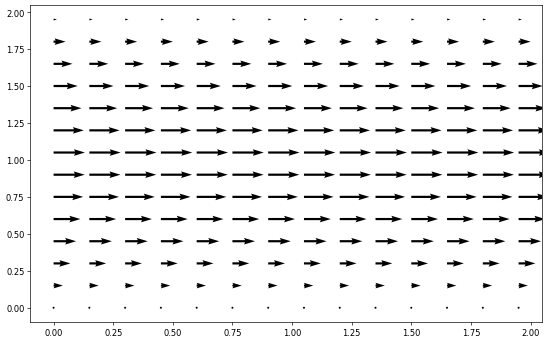

In [54]:
fig = plt.figure(figsize = (11,7), dpi=60)
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3])

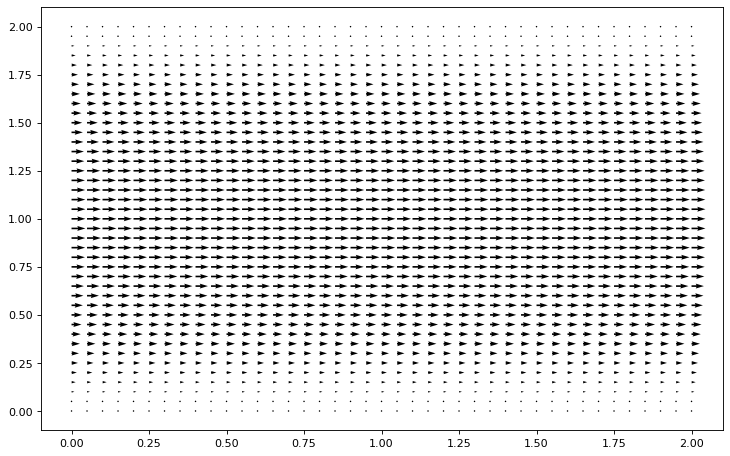

In [55]:
fig = plt.figure(figsize = (11,7), dpi=80)
plt.quiver(X, Y, u, v)

La estructura del comando quiver que es [::3, ::3] son útiles cuando se trata de grandes cantidades de datos que se desean visualizar. El que se ha utilizado arriba dice a matplotlib que sólo trace el tercero de cada punto. Si prescindimos de ello, se puede ver que los resultados pueden parecer un poco abarrotados.